In [25]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.metrics import precision_recall_curve
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print train_data.head()

         id                                       comment_text  toxic  \
0  22256635  Nonsense?  kiss off, geek. what I said is true...      1   
1  27450690  "\n\n Please do not vandalize pages, as you di...      0   
2  54037174  "\n\n ""Points of interest"" \n\nI removed the...      0   
3  77493077  Asking some his nationality is a Racial offenc...      0   
4  79357270  The reader here is not going by my say so for ...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


## Train LSTM on this Data

In [4]:
train_data[train_data['severe_toxic'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
213,2248673613,F'UCK YOU ADMINISTRATORS (I WILL BE BACK TO TR...,1,1,1,0,1,0
480,4961651925,AH HAAHHAHAHAH YAAA BITCH YAAAA!@!!!!!!AH HAAH...,1,1,1,0,1,0
721,7577695878,FROZEN SUCKS LION KING IS THE BESTFROZEN SUCKS...,1,1,1,0,0,0
811,8513138241,This user is a fucking douche bag,1,1,1,0,1,0
869,9111992246,fuck \n\n62.158.73.165 62.158.73.165 62.158...,1,1,1,0,1,0
1223,12813745232,Fuck you \n\nYou suck. Leave me alone. Fuck ti...,1,1,1,0,1,0
1563,16306156070,I am going to shoot you in the head and laugh ...,1,1,0,1,0,0
1695,17546075511,you're a dirty faggot \n\nlick my hairy nut sa...,1,1,1,0,1,0
1703,17628940425,"Stop being a shithead, or I will rip off your ...",1,1,1,1,1,0
1744,17966447643,and why the fuck you say fuck you up there? fu...,1,1,1,0,1,0


In [5]:
all_comments_list = list(train_data['comment_text'])

In [6]:
all_words = [comment.split(' ') for comment in all_comments_list]

In [7]:
all_words_flattened = []
for list_as_words in all_words:
    all_words_flattened.extend(list_as_words)

In [8]:
occurances_counter = Counter(all_words_flattened)
occurances_vec = [a[1] for a in occurances_counter.most_common()]

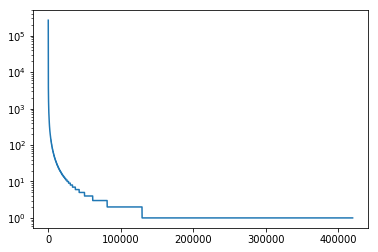

In [9]:
plt.semilogy(np.array(occurances_vec))

In [10]:
y_columns = ['toxic','severe_toxic','obscene','threat', 'insult', 'identity_hate']

In [11]:
train_data_x = list(train_data['comment_text'])
train_data_y = train_data[y_columns].as_matrix()
test_data_x = list(test_data['comment_text'])
test_data_y = train_data[y_columns].as_matrix()

In [12]:
print train_data_y

[[1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ..., 
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [13]:
train_percent = 0.7
val_percent = 0.2
test_percent = 0.1

total_samples_num = len(train_data_y)

train_index = int(total_samples_num * train_percent)
val_index = train_index + int(total_samples_num * val_percent)

In [14]:
train_X = train_data_x[ : train_index]

val_X = train_data_x[train_index : val_index]

test_X = train_data_x[val_index : ]

In [15]:
train_Y = train_data_y[ : train_index]

val_Y = train_data_y[train_index : val_index]

test_Y = train_data_y[val_index : ]

In [16]:
my_tokenizer = Tokenizer(num_words=10000)
my_tokenizer.fit_on_texts(train_X)

In [17]:
train_X_tokenized = my_tokenizer.texts_to_sequences(train_X)
val_X_tokenized = my_tokenizer.texts_to_sequences(val_X)
test_X_tokenized = my_tokenizer.texts_to_sequences(test_X)

In [23]:
X_train_tokenized_padding = sequence.pad_sequences(train_X_tokenized, maxlen = 20)
X_val_tokenized_padding = sequence.pad_sequences(val_X_tokenized, maxlen = 20)
X_test_tokenized_padding = sequence.pad_sequences(test_X_tokenized, maxlen = 20)

## Start Building the Model

In [19]:
max_features = 10000
maxlen = 20  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SimpleRNN(128))  
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

print("Train...")
#model.fit(X_train_tokenized_padding, train_Y, batch_size=batch_size, nb_epoch=1, validation_data=(X_val_tokenized_padding, val_Y))
#acc , loss = model.evaluate(test_X_tokenized, test_Y, batch_size=batch_size)
model.fit(X_train_tokenized_padding, train_Y, batch_size = batch_size, nb_epoch = 1)

Train...


/Users/sharoniegreenblatt/anaconda2/lib/python2.7/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
67095/67095 [==============================] - 40s - loss: 0.1063 - acc: 0.9687    


In [21]:
val_Y_pred = model.predict(X_val_tokenized_padding)

In [22]:
val_Y_pred

array([[ 0.04723661,  0.0008524 ,  0.0117851 ,  0.00045699,  0.0162204 ,
         0.00091017],
       [ 0.03427603,  0.00063775,  0.00986003,  0.00040921,  0.01311199,
         0.00068286],
       [ 0.06780574,  0.00106309,  0.01386319,  0.00053544,  0.02015826,
         0.00094134],
       ..., 
       [ 0.21193518,  0.00179647,  0.04759063,  0.00054384,  0.05994   ,
         0.00156382],
       [ 0.03956074,  0.00095758,  0.00987694,  0.00057515,  0.01480337,
         0.00089638],
       [ 0.06755029,  0.00104757,  0.01406668,  0.00042806,  0.0207062 ,
         0.00093011]], dtype=float32)

In [24]:
test_Y_pred = model.predict(X_test_tokenized_padding)

In [30]:
toxic_y_actual = test_Y[:,0]
toxic_y_pred = test_Y_pred[:,0]

In [31]:
precision, recall, thresholds = precision_recall_curve(toxic_y_actual, toxic_y_pred)

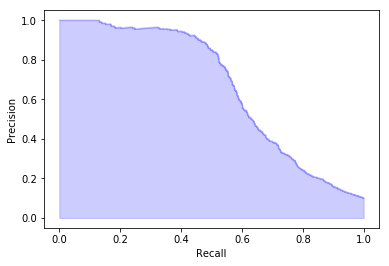

In [33]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')

## Create Function to Feed Model New Setences

In [45]:
def new_sentence_pred(sentence):
    sentence = [sentence]
    sentence_tokenized = my_tokenizer.texts_to_sequences(sentence)
    sentence_tokenized_padding = sequence.pad_sequences(sentence_tokenized, maxlen = 20)
    y_pred = model.predict(sentence_tokenized_padding)
    return y_pred

In [46]:
y_pred = new_sentence_pred("That bitch is so ugly")

In [47]:
print y_pred

[[ 0.97763777  0.10267337  0.86866695  0.01130739  0.74397063  0.09461834]]
